In [71]:
### WEB TRACKING ASSIGNMENT IV
print("*******************************")
print("  WEB SCRAPPING ASSIGNMENT IV")
print("*******************************")
print("  OLUWAJOBA FATOLA  \n  Flip Robo Technology Internship")
print("\n")

*******************************
  WEB SCRAPPING ASSIGNMENT IV
*******************************
  OLUWAJOBA FATOLA  
  Flip Robo Technology Internship




In [30]:
## Install Selenium Package 
! pip install selenium


In [77]:
# Import all necessary library 
import selenium
from selenium.webdriver.common.by import By
from IPython.display import display
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from selenium import webdriver
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementClickInterceptedException
import requests
import time
import re
import requests
from bs4 import BeautifulSoup
from IPython.display import display, HTML
from selenium import webdriver



In [96]:
# Configuring Selenium to use Chrome browser
driver = webdriver.Chrome(r"C:\Users\JOBA\Downloads\chromedriver_win32\chromedriver.exe")

In [97]:
# Connecting to the driver 
driver = webdriver.Chrome(r"chromedriver.exe")

# Q1. Scrape the details of most viewed videos on YouTube from Wikipedia.
Url = https://en.wikipedia.org/wiki/List_of_most-viewed_YouTube_videos

You need to find following details:

A) Rank

B) Name

C) Artist

D) Upload date

E) Views

In [16]:

# Send a GET request to the Wikipedia URL
url = "https://en.wikipedia.org/wiki/List_of_most-viewed_YouTube_videos"
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")

# Find the table containing the most viewed videos
table = soup.find("table", class_="wikitable sortable")

# Create lists to store the extracted details
ranks = []
names = []
artists = []
upload_dates = []
views = []

# Iterate over each row in the table, skipping the header row
rows = table.find_all("tr")[1:]
for row in rows:
    # Extract the required data from each column in the row
    columns = row.find_all("td")
    if len(columns) >= 5:
        ranks.append(columns[0].text.strip())
        names.append(columns[1].text.strip())
        artists.append(columns[2].text.strip())
        upload_dates.append(columns[4].text.strip())
        views.append(columns[3].text.strip())

# Create a data frame using the extracted details
data = {
    "Rank": ranks,
    "Video Name": names,
    "Artist": artists,
    "Upload Date": upload_dates,
    "Views (billions)": views
}
df = pd.DataFrame(data)

# Print the data frame
df


,Rank,Video Name,Artist,Upload Date,Views (billions)
0,1.,"""Baby Shark Dance""[6]",Pinkfong Baby Shark - Kids' Songs & Stories,"June 17, 2016",12.85
1,2.,"""Despacito""[9]",Luis Fonsi,"January 12, 2017",8.16
2,3.,"""Johny Johny Yes Papa""[16]",LooLoo Kids,"October 8, 2016",6.70
3,4.,"""Bath Song""[17]",Cocomelon – Nursery Rhymes,"May 2, 2018",6.20
4,5.,"""Shape of You""[18]",Ed Sheeran,"January 30, 2017",6.00
5,6.,"""See You Again""[21]",Wiz Khalifa,"April 6, 2015",5.89
6,7.,"""Phonics Song with Two Words""[26]",ChuChu TV,"March 6, 2014",5.30
7,8.,"""Wheels on the Bus""[27]",Cocomelon – Nursery Rhymes,"May 24, 2018",5.24
8,9.,"""Uptown Funk""[28]",Mark Ronson,"November 19, 2014",4.92
9,10.,"""Learning Colors – Colorful Eggs on a Farm""[29]",Miroshka TV,"February 27, 2018",4.89


# Q2. Scrape the details team India’s international fixtures from bcci.tv.
Url = https://www.bcci.tv/.
You need to find following details:

A) Match title (I.e. 1stODI)

B) Series

C) Place

D) Date

E) Time

Note: - From bcci.tv home page you have reach to the international fixture page through code.

In [60]:
# Opening the bcci page on automated web browser
driver.get("https://www.bcci.tv/")

In [139]:
# entering international fixture page as required in the question 
search1 = driver.find_element(By.XPATH, '//*[@id="navigation"]/ul[1]/li[2]/a')
search1.click()

In [141]:
import time

match_titles = []

# Scraping the initial match titles
titles = driver.find_elements(By.XPATH, '//span[@class="matchOrderText ng-binding ng-scope"]')
for title in titles:
    match_titles.append(title.text)

# Clicking the "more fixtures" button until no more buttons are found
while True:
    more_buttons = driver.find_elements(By.XPATH, '//button[@class="match-btn btn-red d-flex align-items-center justify-content-center mx-auto mt-3"]')
    if len(more_buttons) == 0:
        break

    more_buttons[0].click()
    time.sleep(2)

    # Scraping the additional match titles
    titles = driver.find_elements(By.XPATH, '//span[@class="matchOrderText ng-binding ng-scope"]')
    for title in titles[len(match_titles):]:
        match_titles.append(title.text)


In [143]:
len(match_titles)

25

In [147]:
series = []


# Scraping the match series
series_elements = driver.find_elements(By.XPATH, '//*[@id="match-card"]/div[1]/h5')
for element in series_elements:
    series.append(element.text)



In [148]:
len(series)

25

In [149]:
place = []

# Scraping the match venue
venue_elements = driver.find_elements(By.XPATH, '//*[@id="match-card"]/div[3]/div/span[2]')
for element in venue_elements:
    place.append(element.text)


In [150]:
len(place)

25

In [151]:
date = []

# Scraping the match venue
date_elements = driver.find_elements(By.XPATH, '//*[@id="match-card"]/div[1]/div/div[1]')
for element in date_elements:
    date.append(element.text)

In [152]:
len(date)

25

In [153]:
time = []

# Scraping the match venue
time_elements = driver.find_elements(By.XPATH, '//*[@id="match-card"]/div[1]/div/div[2]')
for element in time_elements:
    time.append(element.text)

In [154]:
len(time)

25

In [156]:
# Remove the '-' at the end of match titles
cleaned_titles = [title.replace('-', '').strip()[:-1] if title.endswith('-') else title.strip() for title in match_titles]

# Set the display options to show all rows and columns
pd.set_option('display.max_colwidth', None)

# Create the DataFrame
df = pd.DataFrame({
    'Match Title': cleaned_titles,
    'Series': series,
    'Place': place,
    'Date': date,
    'Time': time,
})

# Display the DataFrame
df


,Match Title,Series,Place,Date,Time
0,1st T20,INDIA WOMEN TOUR OF BANGLADESH 2023,"Shere Bangla National Stadium, Mirpur,",9 JUL 2023,9:00 AM BST
1,2nd T20,INDIA WOMEN TOUR OF BANGLADESH 2023,"Shere Bangla National Stadium, Mirpur,",11 JUL 2023,9:00 AM BST
2,1st Tes,INDIA TOUR OF WEST INDIES 2023,"Windsor Park,",12 JUL 2023,3:00 PM BST
3,3rd T20,INDIA WOMEN TOUR OF BANGLADESH 2023,"Shere Bangla National Stadium, Mirpur,",13 JUL 2023,9:00 AM BST
4,1st OD,INDIA WOMEN TOUR OF BANGLADESH 2023,"Shere Bangla National Stadium, Mirpur,",16 JUL 2023,4:30 AM BST
5,2nd OD,INDIA WOMEN TOUR OF BANGLADESH 2023,"Shere Bangla National Stadium, Mirpur,",19 JUL 2023,4:30 AM BST
6,2nd Tes,INDIA TOUR OF WEST INDIES 2023,"Queen's Park Oval,",20 JUL 2023,3:00 PM BST
7,3rd OD,INDIA WOMEN TOUR OF BANGLADESH 2023,"Shere Bangla National Stadium, Mirpur,",22 JUL 2023,4:30 AM BST
8,1st OD,INDIA TOUR OF WEST INDIES 2023,"Kensington Oval,",27 JUL 2023,2:30 PM BST
9,2nd OD,INDIA TOUR OF WEST INDIES 2023,"Kensington Oval,",29 JUL 2023,2:30 PM BST


# Q3.Scrape the details of State-wise GDP of India from statisticstime.com.
Url = http://statisticstimes.com/
You have to find following details:

A) Rank

B) State

C) GSDP(18-19)- at current prices

D) GSDP(19-20)- at current prices

E) Share(18-19)

F) GDP($ billion)

Note: - From statisticstimes home page you have to reach to economy page through code.

In [5]:
# Opening the statisticstime.com page on automated web browser
driver.get("http://statisticstimes.com/")

In [6]:
# Locate the economy dropdown element
dropdown = driver.find_element(By.XPATH, '//*[@id="top"]/div[2]/div[2]/button')

# Click on the dropdown to open the options list
dropdown.click()

# Locate the desired country(India) within the dropdown
option = driver.find_element(By.XPATH, '//*[@id="top"]/div[2]/div[2]/div/a[3]')

# Click on the desired option
option.click()


In [7]:
# Click the GDP of India State Link
search_icon = driver.find_element(By.XPATH, '/html/body/div[2]/div[2]/div[2]/ul/li[1]/a')
search_icon.click()

In [9]:
# Find the table element
table = driver.find_element(By.XPATH, '//*[@id="table_id"]')

In [21]:
# Find the table element
table = driver.find_element(By.XPATH, '//*[@id="table_id"]')

# Extract the data rows
data_rows = table.find_elements(By.TAG_NAME, 'tr')[2:]  # Exclude the header rows

# Create an empty list to store the table body data
table_data = []

# Extract the data cells from table body
for row in data_rows:
    data_cells = row.find_elements(By.TAG_NAME, 'td')
    row_data = [cell.text for cell in data_cells[:6]]  # Only scrape the first 6 columns
    table_data.append(row_data)

# Define your own header
header = ['Rank', 'State', 'GSDP(19-20)-at current price', 'GSDP(18-19)-at current price', 'Share(18-19)', 'GSDP($billion)2019']

# Create DataFrame
df = pd.DataFrame(table_data, columns=header)

df


,Rank,State,GSDP(19-20)-at current price,GSDP(18-19)-at current price,Share(18-19),GSDP($billion)2019
0,1,Maharashtra,-,"2,632,792",13.94%,399.921
1,2,Tamil Nadu,"1,845,853","1,630,208",8.63%,247.629
2,3,Uttar Pradesh,"1,687,818","1,584,764",8.39%,240.726
3,4,Gujarat,-,"1,502,899",7.96%,228.290
4,5,Karnataka,"1,631,977","1,493,127",7.91%,226.806
5,6,West Bengal,"1,253,832","1,089,898",5.77%,165.556
6,7,Rajasthan,"1,020,989","942,586",4.99%,143.179
7,8,Andhra Pradesh,"972,782","862,957",4.57%,131.083
8,9,Telangana,"969,604","861,031",4.56%,130.791
9,10,Madhya Pradesh,"906,672","809,592",4.29%,122.977


# Q4. Scrape the details of trending repositories on Github.com.
Url = https://github.com/
You have to find the following details:

A) Repository title

B) Repository description

C) Contributors count

D) Language used

Note: - From the home page you have to click on the trending option from Explore menu through code.

In [34]:
# Open Github.com
driver.get("https://github.com/")

In [36]:
# Locate the "Open Source" dropdown element
dropdown = driver.find_element(By.XPATH, '/html/body/div[1]/div[1]/header/div/div[2]/div/nav/ul/li[3]')

# Click on the dropdown to open the options list
dropdown.click()

# Locate the "Trending" option within the dropdown
option = driver.find_element(By.XPATH, '/html/body/div[1]/div[1]/header/div/div[2]/div/nav/ul/li[3]/div/div[3]/ul/li[2]/a')

# Click on the desired option
option.click()

In [58]:
# Define a list to store the repository URLs
repository_urls = []

# Find the repository title elements
titles = driver.find_elements(By.XPATH, '//h2[@class="h3 lh-condensed"]/a')

# Extract the URLs from the title elements
for title in titles:
    repository_url = title.get_attribute("href")
    if repository_url is not None:
        repository_urls.append(repository_url)

# Print the repository URLs
#for url in repository_urls:
   # print("Repository URL:", url)


In [59]:
len(repository_urls)

25

In [65]:
# Define lists to store the repository details
titles = []
descriptions = []
counts = []
languages = []
repository_details = []

# Loop through each repository URL and scrape the details
for url in repository_urls:
    driver.get(url)
    time.sleep(2)

    # Scrape the repository title
    try:
        title = driver.find_element(By.XPATH, '//span[@class="author flex-self-stretch"]').text
    except NoSuchElementException:
        title = '-'
    titles.append(title)

    # Scrape the repository description
    try:
        description = driver.find_element(By.XPATH, '//p[@class="f4 my-3"]').text
    except NoSuchElementException:
        description = '-'
    descriptions.append(description)

    # Scrape the contributors count
    try:
        count_element = driver.find_element(By.XPATH, '//span[@class="d-none d-sm-inline"]/strong')
        count = count_element.text
    except NoSuchElementException:
        count = '-'
    counts.append(count)

    # Scrape the repository languages
    try:
        language_elements = driver.find_elements(By.XPATH, '//span[@class="color-fg-default text-bold mr-1"]')
        language = [element.text for element in language_elements]
        language = ', '.join(language)
    except NoSuchElementException:
        language = '-'
    languages.append(language)

    # Append the repository details to the list
    repository_details.append([title, description, count, language])

# Create a DataFrame with the scraped repository details
df = pd.DataFrame(repository_details, columns=["Repository Title", "Repository Description", "Contributors Count", "Languages Used"])

# Set the max_colwidth option to display full text in the DataFrame
pd.set_option("display.max_colwidth", None)

# Display the full DataFrame without truncation
display(df)


,Repository Title,Repository Description,Contributors Count,Languages Used
0,PowerShell,PowerShell for every system!,"10,153","C#, PowerShell, Roff, Shell, Rich Text Format, HTML"
1,WeMakeDevs,-,1,
2,toeverything,"There can be more than Notion and Miro. AFFiNE is a next-gen knowledge base that brings planning, sorting and creating all together. Privacy first, open-source, customizable and ready to use.","3,514","TypeScript, JavaScript, Rust, CSS, Shell, HTML"
3,facebook,An open-source C++ library developed and used at Facebook.,"11,759","C++, Python, CMake, C, Cython, Assembly, Other"
4,ChaoningZhang,This is the official code for Faster Segment Anything (MobileSAM) project that makes SAM lightweight for mobile applications and beyond!,138,"Jupyter Notebook, Other"
5,imgly,Remove backgrounds from images directly in the browser environment with ease and no additional costs or privacy concerns. Explore an interactive demo.,6,"TypeScript, JavaScript"
6,practical-tutorials,Curated list of project-based tutorials,570,
7,wgwang,中国大模型,20,
8,OpenDriveLab,All you need for End-to-end Autonomous Driving,19,
9,ripienaar,"A list of SaaS, PaaS and IaaS offerings that have free tiers of interest to devops and infradev","5,169",HTML


# Q5. Scrape the details of top 100 songs on billiboard.com.
Url = https:/www.billboard.com/
You have to find the following details:

A) Song name

B) Artist name

C) Last week rank

D) Peak rank

E) Weeks on board

Note: - From the home page you have to click on the charts option then hot 100-page link through code.

In [100]:
# Open billiboard.com
driver.get("https:/www.billboard.com/")

In [101]:
# Locate the "Charts" option
charts_option = driver.find_element(By.XPATH, '//*[@id="main-wrapper"]/header/div/div[2]/div/div/div[2]/div[2]/div/div/nav/ul/li[1]/a')

# Click on the "Charts" option
charts_option.click()


In [102]:
# View chart for Billborad Hot 100
hot100_page_link = driver.find_element(By.XPATH, '//*[@id="main-wrapper"]/main/div[2]/div[1]/div[1]/div/div/div[3]/a')

# Click on the view chart option
hot100_page_link.click()

In [104]:
# Find the table element
table = driver.find_element(By.XPATH, '//*[@id="post-1479786"]/div[3]/div/div/div/div[2]')

# Get the header row
header_row = table.find_element(By.TAG_NAME, "ul")

# Get the header cells
header_cells = header_row.find_elements(By.TAG_NAME, "li")

# Extract the header text
headers = [cell.text for cell in header_cells]

# Print the headers
headers


['1',
 '',
 '',
 'Last Night\nMorgan Wallen\n1\n1\n22',
 'Last Night\nMorgan Wallen',
 '',
 '',
 '1',
 '1',
 '22',
 '',
 '',
 '',
 '',
 '',
 '']

# Q6. Scrape the details of Highest sellingnovels.
Url = https://www.theguardian.com/news/datablog/2012/aug/09/best-selling-books-all-time-fifty-shades-grey-compare
You have to find the following details:

A) Book name

B) Author name

C) Volumes sold

D) Publisher

E) Genre


In [37]:
# Send a GET request to the URL
url = "https://www.theguardian.com/news/datablog/2012/aug/09/best-selling-books-all-time-fifty-shades-grey-compare"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Create a BeautifulSoup object to parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing the book details
    table = soup.find('table')

    # Create lists to store the scraped details
    book_names = []
    author_names = []
    volumes_sold = []
    publishers = []
    genres = []
    ranks = []  # New list for ranks

    # Iterate over the rows in the table (skipping the header row)
    rows = table.find_all('tr')[1:]
    for row in rows:
        try:
            # Extract the data from each column in the row
            columns = row.find_all('td')
            if len(columns) >= 6:  # Check if the row has enough columns
                rank = columns[0].text.strip()  # Extract the rank
                book_name = columns[1].text.strip()
                author_name = columns[2].text.strip()
                volume_sold = columns[3].text.strip()
                publisher = columns[4].text.strip()
                genre = columns[5].text.strip()

                # Append the data to the respective lists
                ranks.append(rank)
                book_names.append(book_name)
                author_names.append(author_name)
                volumes_sold.append(volume_sold)
                publishers.append(publisher)
                genres.append(genre)
        except IndexError:
            continue

    # Create a DataFrame with the scraped data
    df = pd.DataFrame({
        'Rank': ranks,
        'Book Name': book_names,
        'Author Name': author_names,
        'Volumes Sold': volumes_sold,
        'Publisher': publishers,
        'Genre': genres
    })

    # Display the DataFrame
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    display(df)
else:
    print("Error: Failed to retrieve data from the website.")


,Rank,Book Name,Author Name,Volumes Sold,Publisher,Genre
0,1,"Da Vinci Code,The","Brown, Dan","5,094,805",Transworld,"Crime, Thriller & Adventure"
1,2,Harry Potter and the Deathly Hallows,"Rowling, J.K.","4,475,152",Bloomsbury,Children's Fiction
2,3,Harry Potter and the Philosopher's Stone,"Rowling, J.K.","4,200,654",Bloomsbury,Children's Fiction
3,4,Harry Potter and the Order of the Phoenix,"Rowling, J.K.","4,179,479",Bloomsbury,Children's Fiction
4,5,Fifty Shades of Grey,"James, E. L.","3,758,936",Random House,Romance & Sagas
5,6,Harry Potter and the Goblet of Fire,"Rowling, J.K.","3,583,215",Bloomsbury,Children's Fiction
6,7,Harry Potter and the Chamber of Secrets,"Rowling, J.K.","3,484,047",Bloomsbury,Children's Fiction
7,8,Harry Potter and the Prisoner of Azkaban,"Rowling, J.K.","3,377,906",Bloomsbury,Children's Fiction
8,9,Angels and Demons,"Brown, Dan","3,193,946",Transworld,"Crime, Thriller & Adventure"
9,10,Harry Potter and the Half-blood Prince:Childre...,"Rowling, J.K.","2,950,264",Bloomsbury,Children's Fiction


# Q7. Scrape the details most watched tv series of all time from imdb.com.
Url = https://www.imdb.com/list/ls095964455/
You have to find the following details:

A) Name

B) Year span

C) Genre

D) Run time

E) Ratings

F) Votes

In [39]:
def scrape_tv_series_details(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        series_list = soup.find_all('div', class_='lister-item-content')

        data = []
        for series in series_list:
            # Name
            name = series.h3.a.text.strip()

            # Year span
            year_span = series.h3.find('span', class_='lister-item-year').text.strip('()')

            # Genre
            genre = series.find('span', class_='genre').text.strip()

            # Run time
            run_time = series.find('span', class_='runtime').text.strip()

            # Ratings
            ratings_tag = series.find('span', class_='ipl-rating-star__rating')
            ratings = ratings_tag.text.strip() if ratings_tag else "N/A"

            # Votes
            votes_tag = series.find('span', attrs={'name': 'nv'})
            votes = votes_tag.text.strip().replace(',', '') if votes_tag else "N/A"

            data.append({
                'Name': name,
                'Year span': year_span,
                'Genre': genre,
                'Run time': run_time,
                'Ratings': ratings,
                'Votes': votes
            })

        df = pd.DataFrame(data)
        return df

# IMDb URL for most watched TV series of all time
url = 'https://www.imdb.com/list/ls095964455/'

# Call the function to scrape the details and get the dataframe
df = scrape_tv_series_details(url)
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
df


,Name,Year span,Genre,Run time,Ratings,Votes
0,Game of Thrones,2011–2019,"Action, Adventure, Drama",57 min,9.2,2176124
1,Stranger Things,2016–2024,"Drama, Fantasy, Horror",51 min,8.7,1253506
2,The Walking Dead,2010–2022,"Drama, Horror, Thriller",44 min,8.1,1033504
3,13 Reasons Why,2017–2020,"Drama, Mystery, Thriller",60 min,7.5,303862
4,The 100,2014–2020,"Drama, Mystery, Sci-Fi",43 min,7.6,263023
5,Orange Is the New Black,2013–2019,"Comedy, Crime, Drama",59 min,8.1,310852
6,Riverdale,2017–2023,"Crime, Drama, Mystery",45 min,6.5,149613
7,Grey's Anatomy,2005–,"Drama, Romance",41 min,7.6,324203
8,The Flash,2014–2023,"Action, Adventure, Drama",43 min,7.5,360122
9,Arrow,2012–2020,"Action, Adventure, Crime",42 min,7.5,438917


# Q8. Details of Datasets from UCI machine learning repositories.
Url = https://archive.ics.uci.edu/
You have to find the following details:

A) Dataset name

B) Data type

C) Task

D) Attribute type

E) No of instances

F) No of attribute

G) Year

Note: - from the home page you have to go to the ShowAllDataset page through code.

In [12]:
# Open the UCI Machine Learning Repository homepage
driver.get('https://archive.ics.uci.edu/')

In [13]:
# Click on the "View All Data Sets" link
view_all_link = driver.find_element(By.XPATH, '//a[@class="btn-primary btn"]')
view_all_link.click()

In [14]:
# List to store the URL titles
url_titles = []

# Calculate the number of pages to scrape
total_urls = 623
urls_per_page = 10
num_pages = total_urls // urls_per_page + 1

for page in range(num_pages):
    try:
        # Scrape URL titles from the current page
        url_elements = driver.find_elements(By.XPATH, '//h2[@class="truncate text-primary"]/a')
        for url_element in url_elements:
            url = url_element.get_attribute("href")
            if url:
                url_titles.append(url)

        if page < num_pages - 1:
            # Click the "Next" button to navigate to the next page
            next_button = driver.find_element(By.XPATH, '//button[@aria-label="Next Page"]')
            next_button.click()
            time.sleep(2)
    except Exception as e:
        print(e)


In [15]:
len(url_titles)

623

In [16]:
url_titles

['https://archive.ics.uci.edu/dataset/53/iris',
 'https://archive.ics.uci.edu/dataset/45/heart+disease',
 'https://archive.ics.uci.edu/dataset/2/adult',
 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset',
 'https://archive.ics.uci.edu/dataset/34/diabetes',
 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik',
 'https://archive.ics.uci.edu/dataset/109/wine',
 'https://archive.ics.uci.edu/dataset/19/car+evaluation',
 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic',
 'https://archive.ics.uci.edu/dataset/73/mushroom',
 'https://archive.ics.uci.edu/dataset/1/abalone',
 'https://archive.ics.uci.edu/dataset/14/breast+cancer',
 'https://archive.ics.uci.edu/dataset/42/glass+identification',
 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data',
 'https://archive.ics.uci.edu/dataset/20/census+income',
 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original',
 'https://archive.ics.uci.edu/dataset/102/thyroid+dis

In [17]:
type(url)

str

In [20]:
# Define lists to store the repository details
dataset_names = []
data_types = []
tasks = []
attribute_types = []
num_instances = []
num_attributes = []
years = []

# Create a single WebDriver instance
driver = webdriver.Chrome(executable_path=r'C:\Users\JOBA\Downloads\chromedriver_win32\chromedriver.exe')
driver = webdriver.Chrome(r"chromedriver.exe")

# Loop through each repository URL and scrape the details
for url in url_titles:
    #print("Current URL:", url)
    driver.get(url)
    time.sleep(2)

    # Scrape the dataset name
    try:
        dataset_name = driver.find_element(By.XPATH, '//h1[@class="text-3xl font-semibold text-primary-content"]')
        dataset_name_text = dataset_name.text.strip()
        dataset_names.append(dataset_name_text)
    except NoSuchElementException:
        dataset_names.append('-')

    # Scrape the data type
    try:
        data_type = driver.find_element(By.XPATH, '/html/body/div/div[1]/div[1]/main/div/div[1]/div[1]/div[2]/div[2]/div[1]/p')
        data_type_text = data_type.text.strip()
        data_types.append(data_type_text)
    except NoSuchElementException:
        data_types.append('-')

    # Scrape the task
    try:
        task = driver.find_element(By.XPATH, '/html/body/div/div[1]/div[1]/main/div/div[1]/div[1]/div[2]/div[2]/div[3]/p')
        task_text = task.text.strip()
        tasks.append(task_text)
    except NoSuchElementException:
        tasks.append('-')

    # Scrape the attribute type
    try:
        attribute_type = driver.find_element(By.XPATH, '/html/body/div/div[1]/div[1]/main/div/div[1]/div[1]/div[2]/div[2]/div[4]/p')
        attribute_type_text = attribute_type.text.strip()
        attribute_types.append(attribute_type_text)
    except NoSuchElementException:
        attribute_types.append('-')

    # Scrape the number of instances
    try:
        num_instances_element = driver.find_element(By.XPATH, '/html/body/div/div[1]/div[1]/main/div/div[1]/div[1]/div[2]/div[2]/div[5]/p')
        num_instances_text = num_instances_element.text.strip()
        num_instances.append(num_instances_text)
    except NoSuchElementException:
        num_instances.append('-')

    # Scrape the number of attributes
    try:
        num_attributes_element = driver.find_element(By.XPATH, '/html/body/div/div[1]/div[1]/main/div/div[1]/div[1]/div[2]/div[2]/div[6]/p')
        num_attributes_text = num_attributes_element.text.strip()
        num_attributes.append(num_attributes_text)
    except NoSuchElementException:
        num_attributes.append('-')

    # Scrape the year
    try:
        year_element = driver.find_element(By.XPATH, '//h2[@class="text-primary-content"]')
        year_text = year_element.text.split('/')[-1]
        years.append(year_text)

    except NoSuchElementException:
        years.append('-')

# Create a DataFrame with the scraped dataset details
df = pd.DataFrame({
    'Dataset Name': dataset_names,
    'Data Type': data_types,
    'Task': tasks,
    'Attribute Type': attribute_types,
    'No of Instances': num_instances,
    'No of Attributes': num_attributes,
    'Year': years
})

# Display the DataFrame without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df)


,Dataset Name,Data Type,Task,Attribute Type,No of Instances,No of Attributes,Year
0,Iris,Multivariate,Classification,Real,150,4,6/30/1988
1,Heart Disease,Multivariate,Classification,"Categorical, Integer, Real",303,13,6/30/1988
2,Adult,Multivariate,Classification,"Categorical, Integer",48842,14,4/30/1996
3,Dry Bean Dataset,Multivariate,Classification,"Integer, Real",13611,17,9/13/2020
4,Diabetes,"Multivariate, Time-Series",-,"Categorical, Integer",-,20,-
5,Rice (Cammeo and Osmancik),Multivariate,Classification,Real,3810,8,10/5/2019
6,Wine,Multivariate,Classification,"Integer, Real",178,13,6/30/1991
7,Car Evaluation,Multivariate,Classification,Categorical,1728,6,5/31/1997
8,Breast Cancer Wisconsin (Diagnostic),Multivariate,Classification,Real,569,30,10/31/1995
9,Mushroom,Multivariate,Classification,Categorical,8124,22,4/26/1987


# Q9.Scrape the details of Data science recruiters Url = https://www.naukri.com/hr-recruiters-consultants 
You have to find the following details:

A) Name

B) Designation

C)Company

D)Skills they hire for

E) Location

Note: - From naukri.com homepage click on the recruiters option and the on the search pane type Data science and
click on search. All this should be done through code

In [68]:
# Open naukri.com homepage
driver.get('https://www.naukri.com/hr-recruiters-consultants')

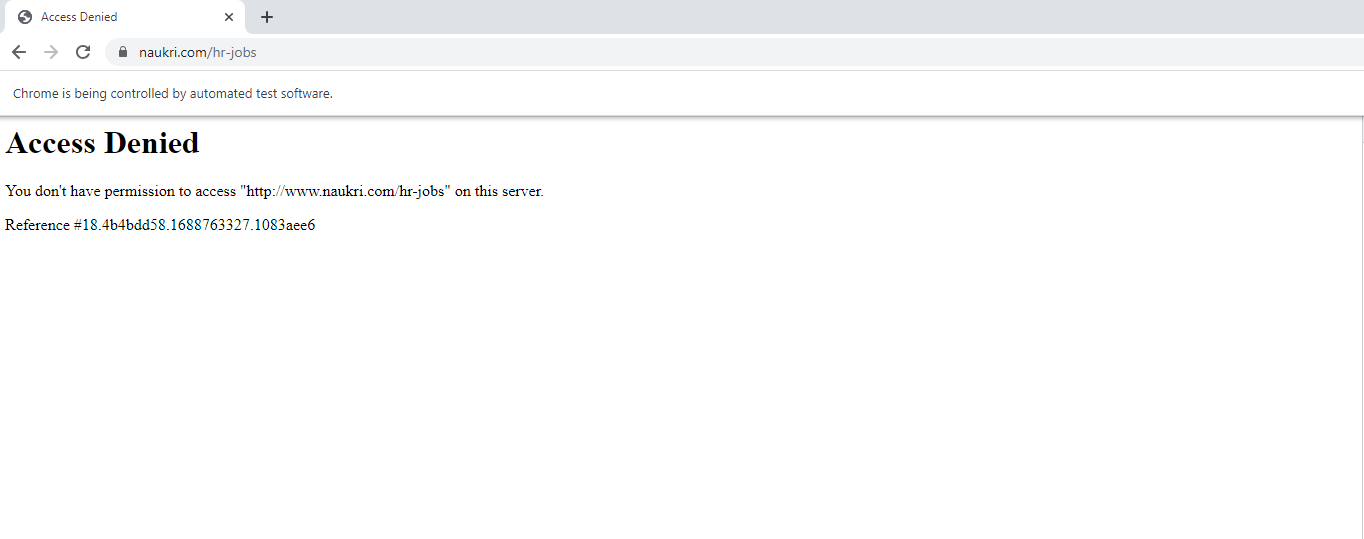

In [81]:
# Open naukri.com homepage
driver.get('https://www.naukri.com/')

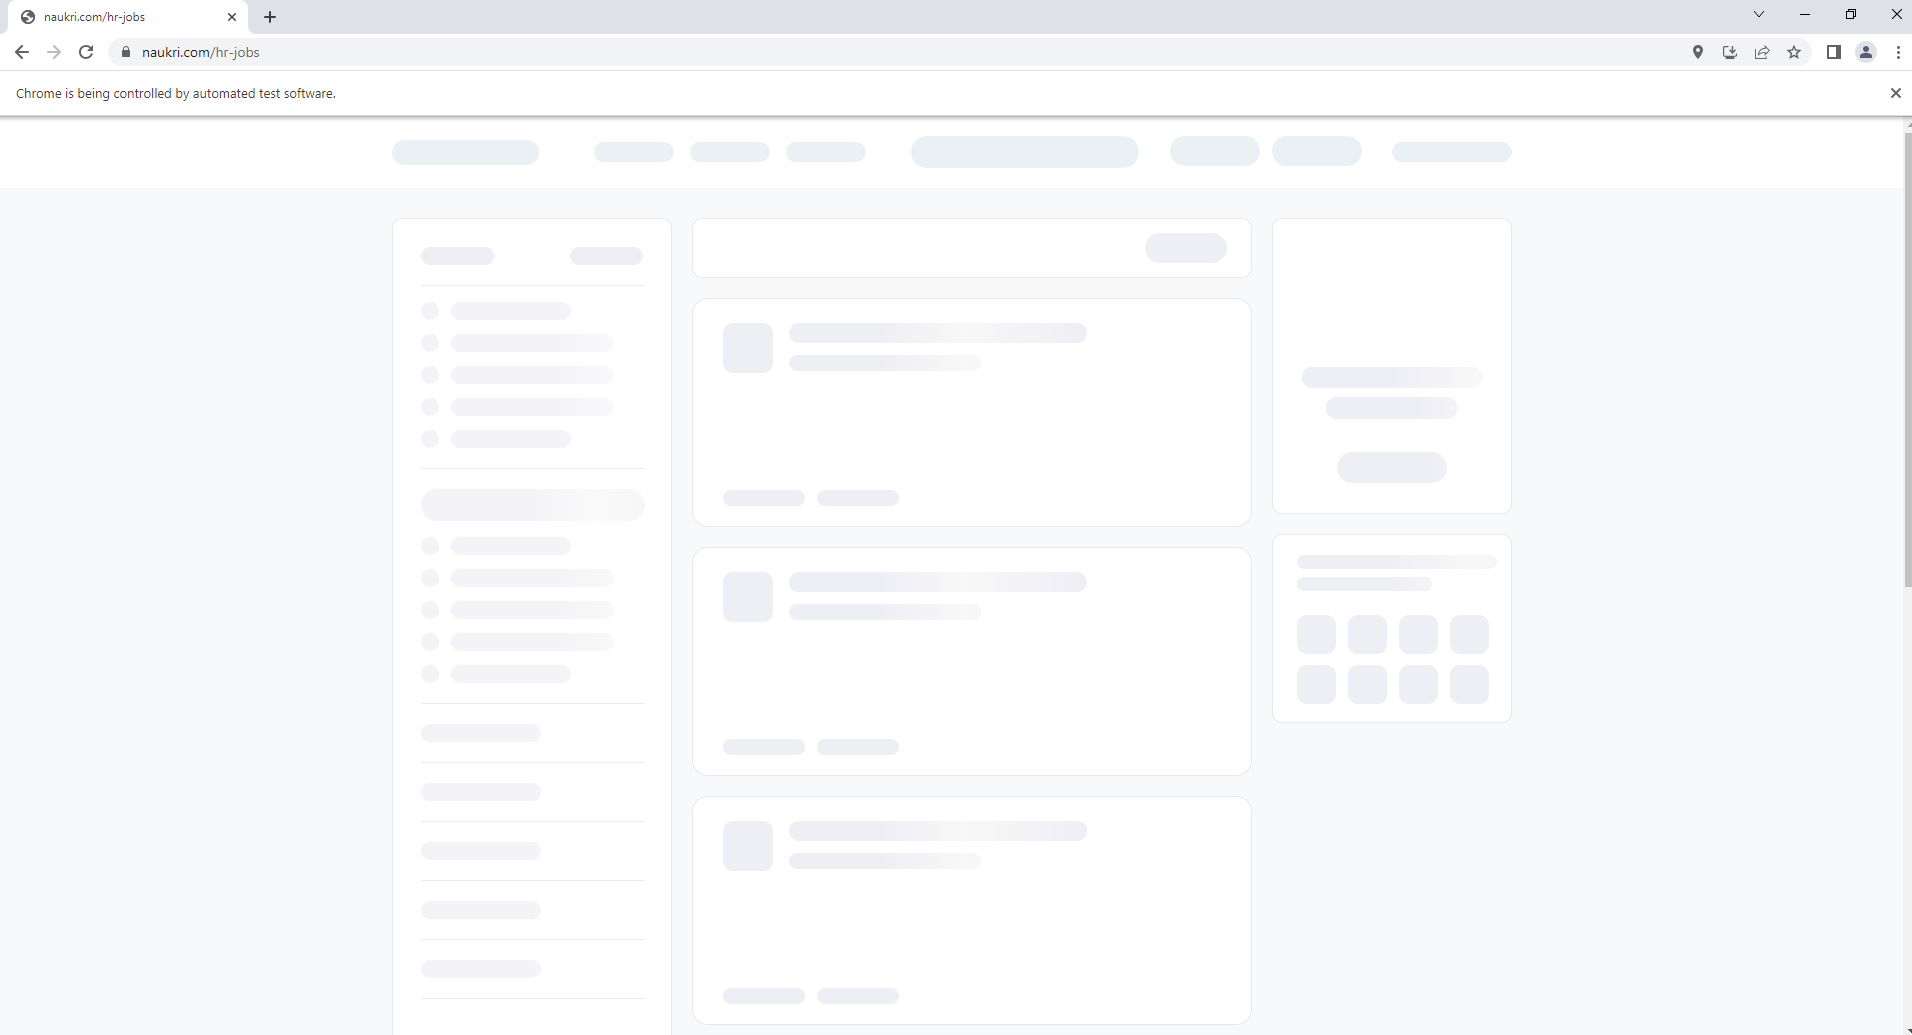

In [82]:
# Open naukri.com homepage
driver.get('https://www.naukri.com/')

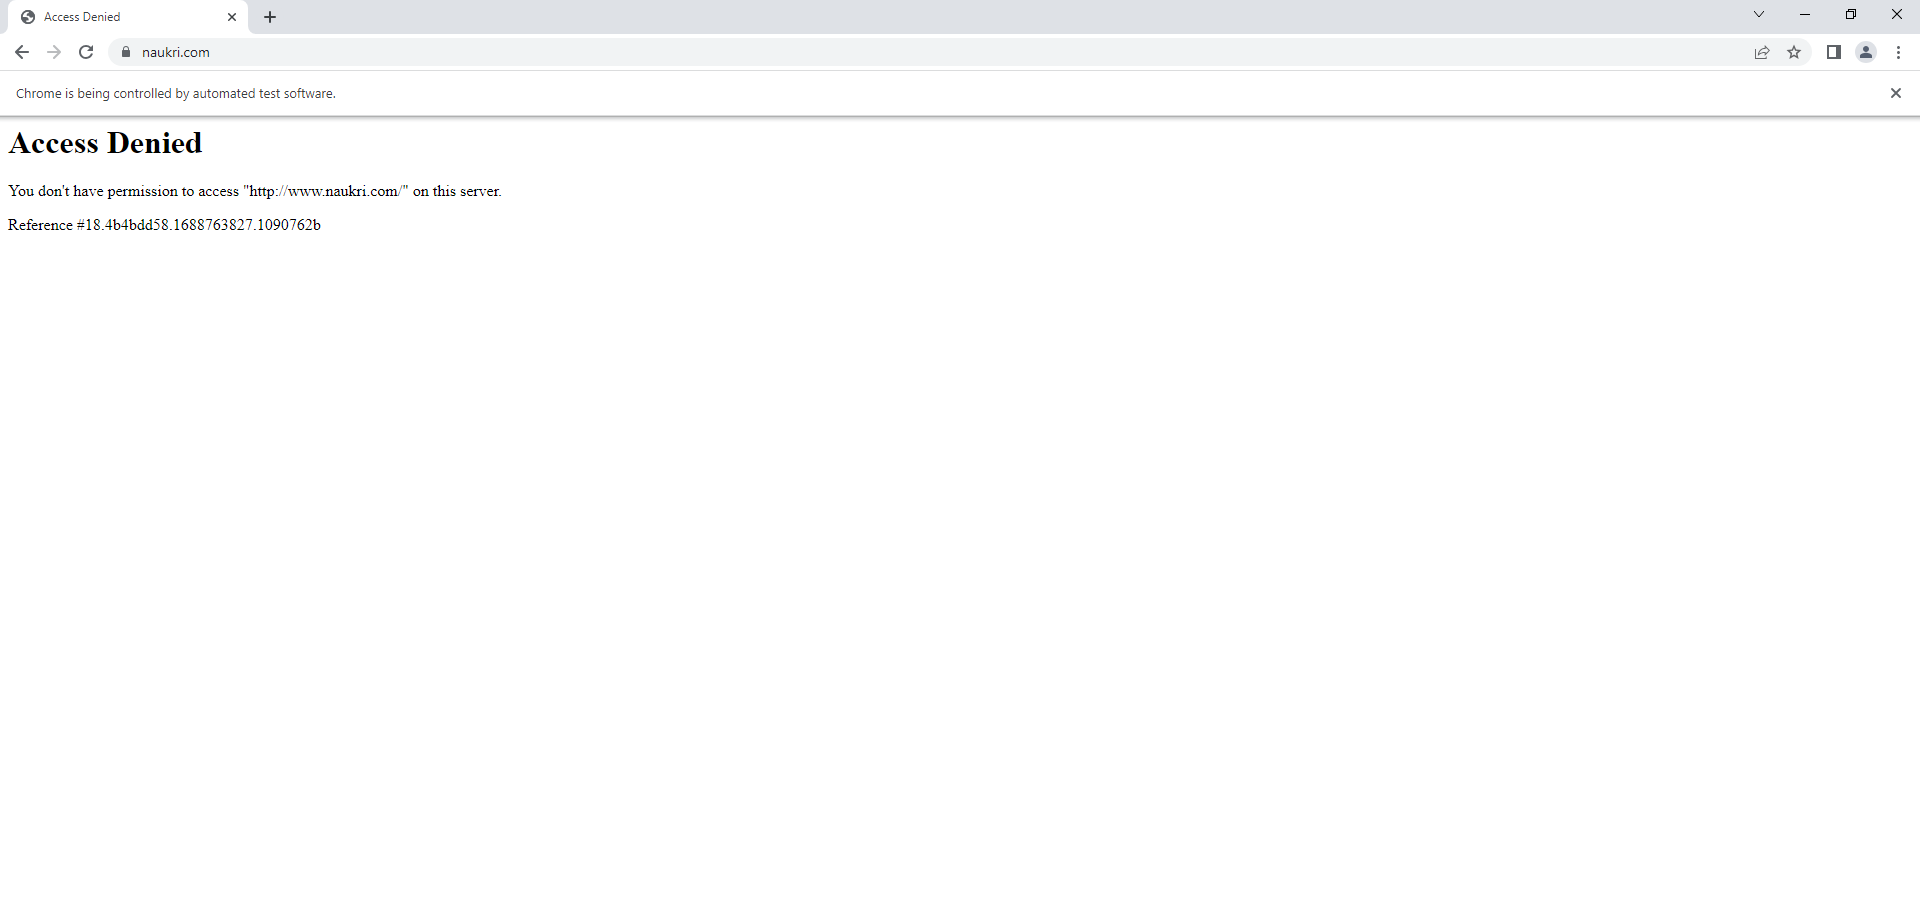